In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [29]:
df = pd.read_csv('insurance.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [30]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [31]:
print(x)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]


In [32]:
print(y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [33]:
z=df.isna()
print(z)

        age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]


In [101]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers =[('encoder',OneHotEncoder(),[1,4,5])],remainder='passthrough')
x = ct.fit_transform(x)
print(x)

[[0.0 1.0 0.0 ... 19 27.9 0]
 [1.0 0.0 0.0 ... 18 33.77 1]
 [1.0 0.0 0.0 ... 28 33.0 3]
 ...
 [0.0 1.0 0.0 ... 18 36.85 0]
 [0.0 1.0 0.0 ... 21 25.8 0]
 [0.0 1.0 0.0 ... 61 29.07 0]]


In [102]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=.1,random_state=0)

In [103]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_tr,y_tr)

LinearRegression()

In [104]:
from sklearn.metrics import r2_score,mean_squared_error
y_pred = lr.predict(x_te)
r2 = r2_score(y_te,y_pred)
mse = mean_squared_error(y_te,y_pred)
print(mse)
print(r2)

34577221.79775881
0.8216781468713605


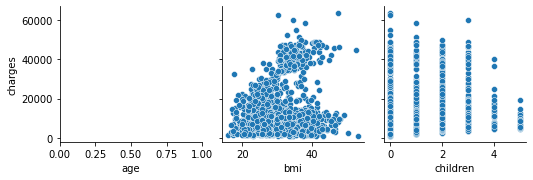

In [105]:
sns.pairplot(df,x_vars=['age','bmi','children'],y_vars=['charges'])
plt.show()

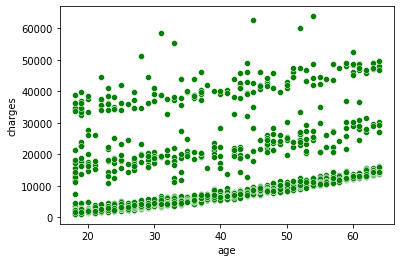

In [107]:
sns.scatterplot(data = df,x='age',y = 'charges',color='green')
plt.show()